# House Price Data Visualization

<a id=1></a>
## 1. Story Line


   >For Every Person in the world, There are three main things which are the basic need for a human, they are:
   
   1. **Food**
   2. **Cloth**
   3. **Home**
       
   One can obtain **Food and clothes** with a low or easily offerdable price by doing a small or daily wages, But when coming in to **Home**, it is a big dream for many people. 
   
  Nowadays, It is really hard for anyone to easily buy a home, because the home price is huge based on some key criteria which will decide the house price. One needs to deeply understand the key parameters before looking for a new home based on his budget and requirements .
  
  One of the parameter which everyone consider is the neighborhood. So with all this in mind, we will interpret with the parameters in the below data set to find best criteria to fina a best house. 

In [1]:
# All Required libraries will be imported  here
import pandas as pd            
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Magic Function to display the charts in the notebook  
%matplotlib inline          
sns.set_style("whitegrid")     #To set the whitegrid background for all 
data = pd.read_csv('house_prices.csv') # Load the required data.
data.sample(10)  

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
3976,2840,A,1063,3,2,ranch,276095
4484,7162,B,5372,8,5,victorian,2661627
5445,456,C,916,2,1,ranch,239487
3542,371,C,2201,4,2,ranch,558403
340,5365,C,4186,6,4,victorian,1050987
2943,971,A,3347,5,3,victorian,842763
1590,4483,B,771,0,0,lodge,392322
3995,5466,B,984,2,1,ranch,497567
2439,5768,A,4081,6,4,victorian,1024947
2680,3200,A,3105,5,3,victorian,782747


In [2]:
area_mean = data.area.mean()
area_mean

2136.8490378234906

So what is the of the **shape** of area columns, is there any skewness in the data?

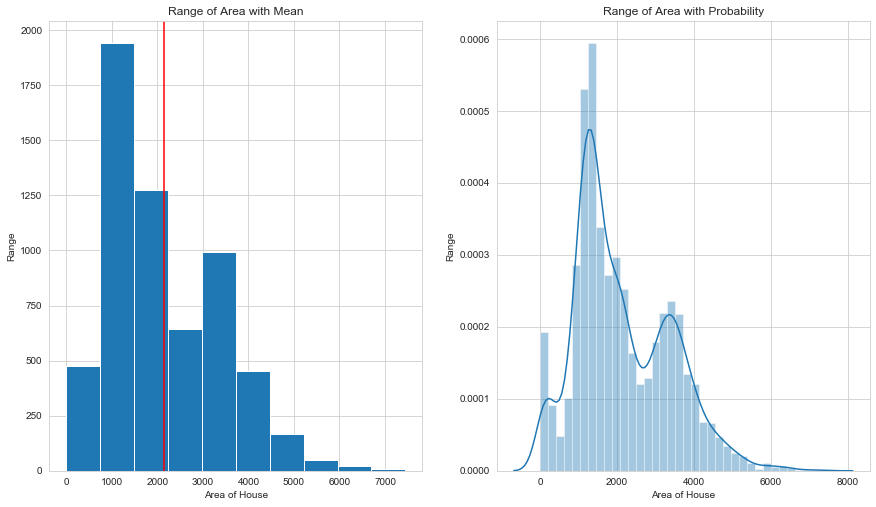

In [3]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1,2,1)
plt.hist(data['area']);
plt.axvline(area_mean, color = 'r')  #This plots a line in the mean area
plt.xlabel("Area of House")
plt.ylabel("Range")
plt.title("Range of Area with Mean")

plt.subplot(1,2,2)
sns.distplot(data['area'])
plt.xlabel("Area of House")
plt.ylabel("Range")
plt.title("Range of Area with Probability");

From the above plot, We can see that data is right skewed and the mean is at between 2136 sq.meters. Also we see can that there more house in the range of 1000 to 2000 sq.meters and the second chart shows the probability of the area.

Now, we want to know what propotion of the houses are there are in style and neighborhood parameters.

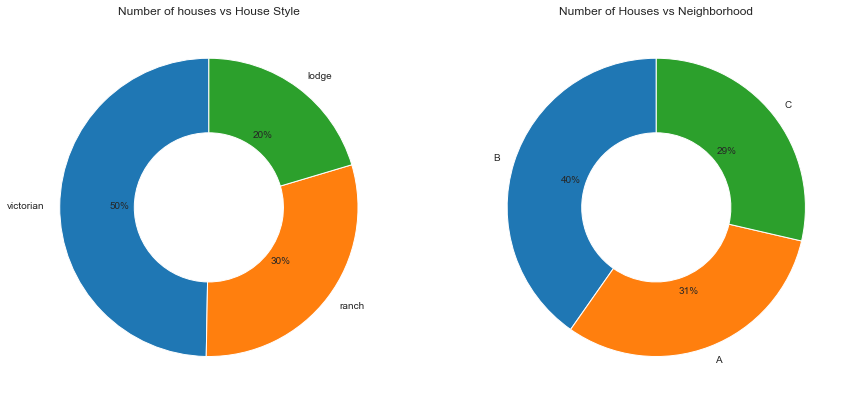

In [4]:
plt.figure(figsize=[14.70, 8.27])
#Pie chart for Number of Houses based on House Style
plt.subplot(1,2,1)
style = data['style'].value_counts().reset_index()

# The below code witll plot a pie chart with respective labels and it's propotion in the data
plt.pie(style['style'], wedgeprops=dict(width=0.5),labels=style['index'],autopct='%1.0f%%',startangle=90);
plt.title("Number of houses vs House Style");

#Pie chart for Number of Houses based on Neighborhood
plt.subplot(1,2,2)
neighbor = data['neighborhood'].value_counts().reset_index()

# The below code witll plot a pie chart with respective labels and it's propotion in the data
plt.pie(neighbor['neighborhood'], wedgeprops=dict(width=0.5),labels=neighbor['index'],
            autopct='%1.0f%%',startangle=90, counterclock=True);
plt.title("Number of Houses vs Neighborhood");

The above two Pie(Donut) Charts shows the proportion of houses based on `Style` and `Neighborhood` columns. It shows there are many houses with `victorian` style and Many Hosues with `B` as Neighborhood in the data set.

What is relation of `area` with `style` and `neighborhood` parameters

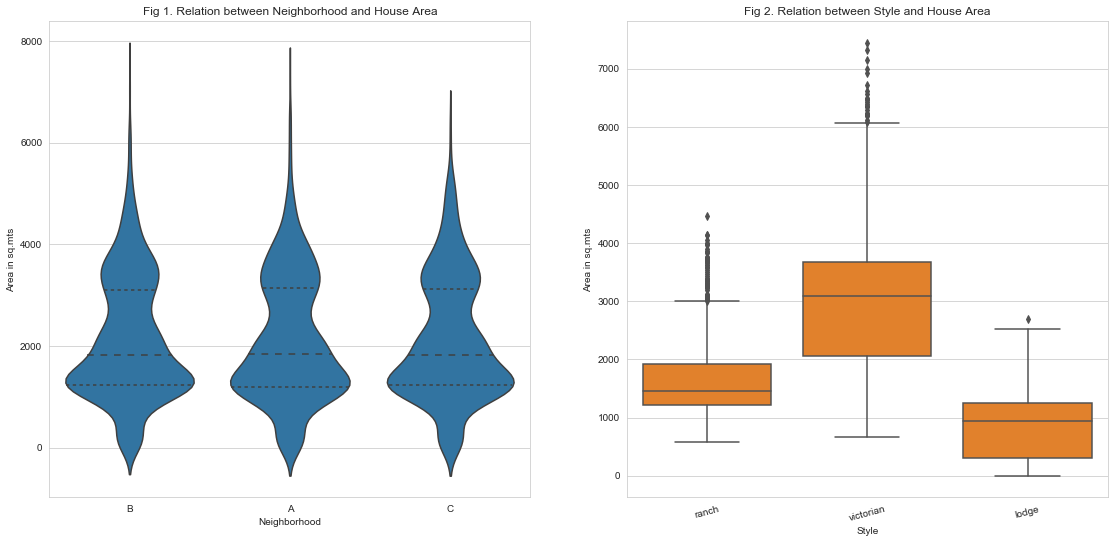

In [5]:
plt.figure(figsize=[14.70, 8.27])
#Violin chart to get relation between Neighborhood and House Area
plt.subplot(1,2,1)
colors = sns.color_palette()[0]
#The below code will plot the violin chart with quartile lines
sns.violinplot(x='neighborhood',y='area',data=data, inner = 'quartile', color=colors);
plt.title("Fig 1. Relation between Neighborhood and House Area")
plt.xlabel("Neighborhood")
plt.ylabel("Area in sq.mts");

plt.subplot(1,2,2)
colors = sns.color_palette()[1]
#The below code will plot the boxplot chart for stryle and area columns
sns.boxplot(x='style',y='area',data=data,  color=colors);
plt.title("Fig 2. Relation between Style and House Area")
plt.xlabel("Style")
plt.ylabel("Area in sq.mts");
plt.xticks(rotation=15)
plt.subplots_adjust(bottom=0.1, left = 0, right=1, top=0.9);

**Fig 1:**
This **Violin Chart** provides the relationship between category and numeric values. By which we can observe that the mean area of all Neighborhood as are in same location and as well min, first & third quartile. only the maximum value differs due to the outlier values of victorian style homes.

**Fig 2:**
This **Box plot** provides the relation between Style and House Area. We can see a many outlier points above the max whisker of victorian box. we can observe there are outlier values for eacy style houses which decidec the price of the house

In [6]:
style_neighbor = data.groupby(['style','neighborhood']).size().reset_index(name='count')
style_neighbor = style_neighbor.pivot(index = 'style', columns = 'neighborhood', values='count')
style_neighbor

neighborhood,A,B,C
style,,,
lodge,397,486,346
ranch,553,734,515
victorian,926,1207,864


So which style and neighborhood has More and Less  houses

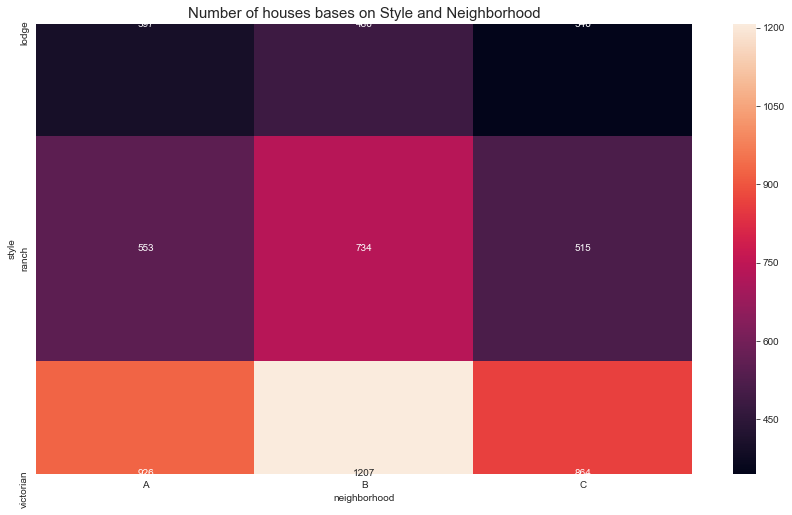

In [7]:
#Here is the heatmap for all unique column values in style and neighborhood columns
plt.figure(figsize=[14.70, 8.27])
ax = plt.axes()
graph = sns.heatmap(style_neighbor, annot=True, fmt='d' ,ax = ax)
ax.set_title('Number of houses bases on Style and Neighborhood', size =15);

This **Heat Map** provides the correlation between  `style` and `neighborhood` parameters. By which we can see that `Neighborhood B` and `Victorian Style` are more with **1207** house and `Neighborhood C` and `Lodge Style` are less with **346** houses 

Is there any errors with the price having neighborhood and style parameters. 

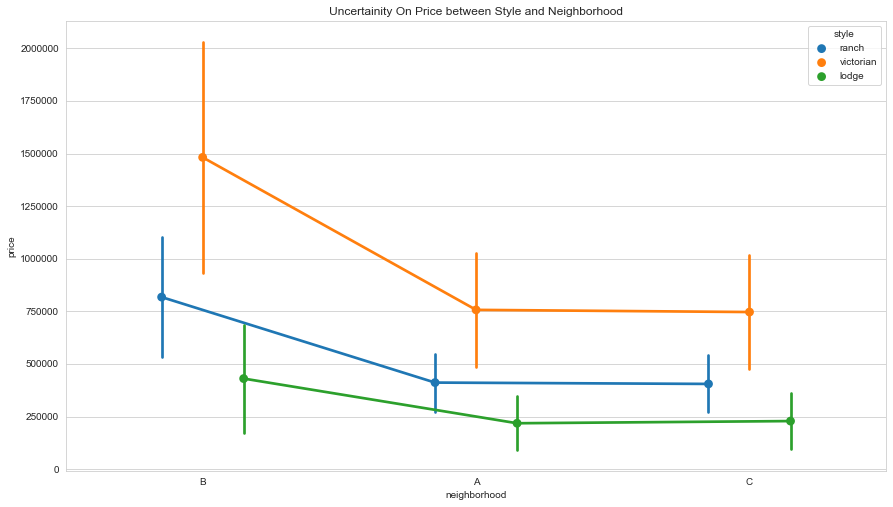

In [8]:
#The Below pointplot gives uncrtainity in the at std deviation between price, style & Neighborhood
plt.figure(figsize=[14.70, 8.27])
ax = plt.axes()
graph = sns.pointplot(data=data, x='neighborhood', y='price', hue='style',dodge = 0.3, ci ='sd', ax=ax)
ax.set_title('Uncertainity On Price between Style and Neighborhood');

This **Point plot** provides the central tendancy uncertainty of the standard deviation error between style and neighborhood based on price parameter.

<a id=5></a>
## 5.Conclusion

> After interpreting with all the parameters in the given data set, we observed the below key points

- There is a skewness in the area column due to the large area of victorian houses, in which it indicates these houses are built for luxury and expensive.
- By the proportion of `Style` and `Neighborhood` columns, There are many houses with `victorian` style and Many Hosues with `B` as Neighborhood in the data set and We found that the mean area of all `Neighborhood` as are in same location and as well min, first & third quartile valuse only the maximum value differs due to the outlier values of victorian style homes between `Neighborhood` and `area`
- With `Style` and House `Area`. We can see a many outlier points above the max whisker of victorian box. we can observe there are outlier values for eacy style houses which decidec the price of the house
- From **Heat Map** between  `style` and `neighborhood` parameters. We can see that `Neighbourbood B` and `Victorian Style` are more with **1207** house and `Neighborhood C` and `Lodge Style` are less with **346** houses.
- And Finally from  **Point plot** We got the central tendancy uncertainty of the standard deviation error between `style` and `neighborhood` based on `price` parameter.